# Dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import xgboost
import catboost
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

warnings.filterwarnings('ignore')

# Data Loading

In [3]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_valid.csv')
y_test = pd.read_csv('y_valid.csv')

In [24]:
catboost_model = catboost.CatBoostClassifier(loss_function='MultiClass', verbose=False)

# Define the parameter grid
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    # 'subsample': [0.8, 0.9, 1],
    'auto_class_weights': ['None', 'Balanced']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, predictions)
print(report)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END auto_class_weights=None, border_count=32, depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.6s
[CV] END auto_class_weights=None, border_count=32, depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.3s
[CV] END auto_class_weights=None, border_count=32, depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   0.3s
[CV] END auto_class_weights=None, border_count=32, depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END auto_class_weights=None, border_count=32, depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END auto_class_weights=None, border_count=32, depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   0.3s
[CV] END auto_class_weights=None, border_count=32, depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   0.3s
[CV] END auto_class_weights=

In [28]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize XGBClassifier and GridSearchCV
xgb_model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Use the best model to make predictions on the test set
best_model = grid_search_xgb.best_estimator_
xgb_predictions = best_model.predict(X_test)

# Best parameters and score
print(f"Best XGB parameters: {grid_search_xgb.best_params_}")
print(f"Best XGB score: {grid_search_xgb.best_score_}")


# Generate and print the classification report
report = classification_report(y_test, xgb_predictions)
print(report)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.6

In [31]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomForestClassifier and GridSearchCV
rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Use the best model to make predictions on the test set
best_model = grid_search_rf.best_estimator_
rf_predictions = best_model.predict(X_test)

# Best parameters and score
print(f"Best RF parameters: {grid_search_rf.best_params_}")
print(f"Best RF score: {grid_search_rf.best_score_}")


# Generate and print the classification report
report = classification_report(y_test, rf_predictions)
print(report)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   4.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   4.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, m

In [32]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize AdaBoostClassifier and GridSearchCV
ada_model = AdaBoostClassifier()
grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search_ada.fit(X_train, y_train)

# Use the best model to make predictions on the test set
best_model = grid_search_ada.best_estimator_
ada_predictions = best_model.predict(X_test)

# Best parameters and score
print(f"Best AdaBoost parameters: {grid_search_ada.best_params_}")
print(f"Best AdaBoost score: {grid_search_ada.best_score_}")


# Generate and print the classification report
report = classification_report(y_test, ada_predictions)
print(report)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.9s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.9s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.8s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.7s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   3.8s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   4.1s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   3.8s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.0s
[CV] END .................learning_rate=0.1, n_es

In [33]:
# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, -1],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 62, 127]
}

# Initialize LGBMClassifier and GridSearchCV
lgbm_model = LGBMClassifier()
grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model
grid_search_lgbm.fit(X_train, y_train)

# Use the best model to make predictions on the test set
best_model = grid_search_lgbm.best_estimator_
lgbm_predictions = best_model.predict(X_test)

# Best parameters and score
print(f"Best LGBM parameters: {grid_search_lgbm.best_params_}")
print(f"Best LGBM score: {grid_search_lgbm.best_score_}")


# Generate and print the classification report
report = classification_report(y_test, lgbm_predictions)
print(report)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4554
[LightGBM] [Info] Number of data points in the train set: 3304, number of used features: 22
[LightGBM] [Info] Start training from score -1.098915
[LightGBM] [Info] Start training from score -1.098007
[LightGBM] [Info] Start training from score -1.098915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END learning_rate=

In [34]:
# Assuming you have the best parameters and scores stored as follows:

best_params_cat = grid_search.best_params_
best_score_cat = grid_search.best_score_

best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_ada = grid_search_ada.best_params_
best_score_ada = grid_search_ada.best_score_

best_params_lgbm = grid_search_lgbm.best_params_
best_score_lgbm = grid_search_lgbm.best_score_

# Create a DataFrame to summarize the results
summary_df = pd.DataFrame({
    'Model': ['CatBoost', 'XGBoost', 'Random Forest', 'AdaBoost', 'LightGBM'],
    'Best Score': [best_score_cat, best_score_xgb, best_score_rf, best_score_ada, best_score_lgbm],
    'Best Parameters': [best_params_cat, best_params_xgb, best_params_rf, best_params_ada, best_params_lgbm]
})

# Display the DataFrame
print(summary_df)

           Model  Best Score  \
0       CatBoost    0.994956   
1        XGBoost    0.994956   
2  Random Forest    0.993947   
3       AdaBoost    0.874899   
4       LightGBM    0.994552   

                                     Best Parameters  
0  {'auto_class_weights': 'Balanced', 'border_cou...  
1  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...  
2  {'max_depth': None, 'min_samples_split': 2, 'n...  
3        {'learning_rate': 1.0, 'n_estimators': 200}  
4  {'learning_rate': 0.2, 'max_depth': 20, 'n_est...  


In [35]:
print(summary_df.to_string())

           Model  Best Score                                                                                                                  Best Parameters
0       CatBoost    0.994956  {'auto_class_weights': 'Balanced', 'border_count': 128, 'depth': 10, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
1        XGBoost    0.994956                                                    {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
2  Random Forest    0.993947                                                                 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
3       AdaBoost    0.874899                                                                                      {'learning_rate': 1.0, 'n_estimators': 200}
4       LightGBM    0.994552                                                  {'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 300, 'num_leaves': 127}


In [4]:
# Initialize the models with the best parameters found from grid search
cat_model = catboost.CatBoostClassifier(depth=10, learning_rate=0.1, iterations=200, auto_class_weights='Balanced', border_count=128, l2_leaf_reg=1, verbose=False)
xgb_model = xgboost.XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=300, use_label_encoder=False, eval_metric='mlogloss')

# Train the models
cat_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
cat_predictions = cat_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Accuracy & F1score
cat_accuracy = accuracy_score(y_test, cat_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

cat_f1 = f1_score(y_test, cat_predictions, average='weighted') 
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')


print(f"CatBoost Accuracy: {cat_accuracy}")
print(f"CatBoost F1 Score: {cat_f1}")

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost F1 Score: {xgb_f1}")


CatBoost Accuracy: 0.9866962305986696
CatBoost F1 Score: 0.9858405421442178
XGBoost Accuracy: 0.9822616407982262
XGBoost F1 Score: 0.981728185731055


In [5]:
X_sub = pd.read_csv('X_test.csv')
y_sub = pd.read_csv('y_test.csv')

In [6]:
# Predictions
cat_predictions = cat_model.predict(X_sub)
xgb_predictions = xgb_model.predict(X_sub)

# Accuracy & F1score
cat_accuracy = accuracy_score(y_sub, cat_predictions)
xgb_accuracy = accuracy_score(y_sub, xgb_predictions)

cat_f1 = f1_score(y_sub, cat_predictions, average='weighted') 
xgb_f1 = f1_score(y_sub, xgb_predictions, average='weighted')


print(f"CatBoost Accuracy: {cat_accuracy}")
print(f"CatBoost F1 Score: {cat_f1}")

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost F1 Score: {xgb_f1}")

CatBoost Accuracy: 0.9874371859296482
CatBoost F1 Score: 0.986396005003206
XGBoost Accuracy: 0.9899497487437185
XGBoost F1 Score: 0.9893065326633167


In [10]:
def prediction_report(model) :
    
    # XX = dataset.drop('OS' , axis=1)
    # yy = dataset['OS']

    # if modelName == 'rf' :
    #     model = RandomForestClassifier(n_estimators=200)
    # if modelName == 'xgb' :
    #     model = XGBClassifier()
    # if modelName == 'cat' :
    #     model = CatBoostClassifier()

    
    # model.fit(XX , yy)

    true_labels = y_sub
    predicted_probabilities = model.predict_proba(X_sub)

    report = classification_report(true_labels, np.argmax(predicted_probabilities, axis=1))
    print("Classification Report:\n", report)

    # Compute ROC AUC score
    roc_auc = roc_auc_score(true_labels, predicted_probabilities, multi_class='ovr')  # One-vs-Rest strategy
    print("ROC AUC Score:", roc_auc)

    # Plot ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve((true_labels == i).astype(int), predicted_probabilities[:, i])
        roc_auc[i] = roc_auc_score((true_labels == i).astype(int), predicted_probabilities[:, i])

    plt.figure()
    plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label=f'Class 0 (AUC = {roc_auc[0]:.2f})')
    plt.plot(fpr[1], tpr[1], color='green', lw=2, label=f'Class 1 (AUC = {roc_auc[1]:.2f})')
    plt.plot(fpr[2], tpr[2], color='blue', lw=2, label=f'Class 2 (AUC = {roc_auc[2]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-class Classification')
    plt.legend(loc="lower right")
    plt.show()

    sns.heatmap(confusion_matrix(true_labels , np.argmax(predicted_probabilities, axis=1)) , annot=True , cmap='YlGnBu')
    plt.show()

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       373
         1.0       1.00      1.00      1.00         8
         2.0       1.00      0.71      0.83        17

    accuracy                           0.99       398
   macro avg       1.00      0.90      0.94       398
weighted avg       0.99      0.99      0.99       398

ROC AUC Score: 0.9781317518246665


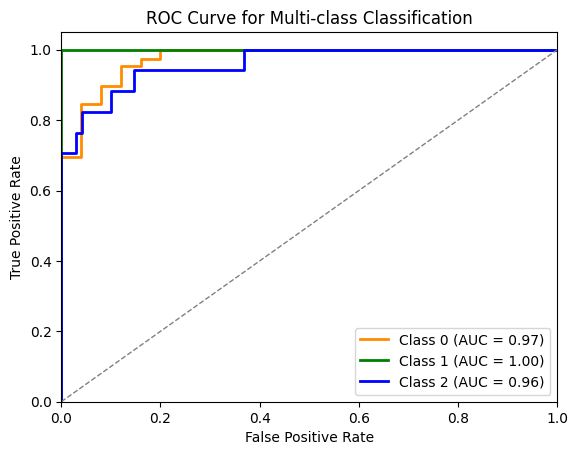

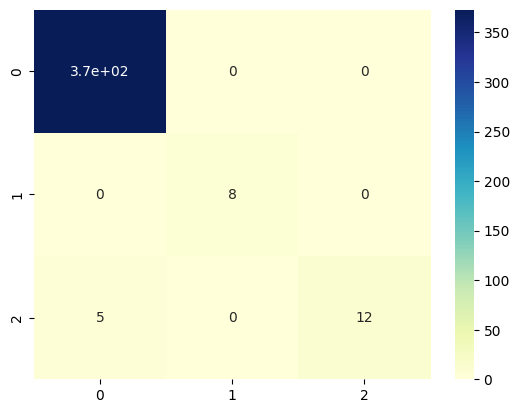

In [11]:
prediction_report(cat_model)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       373
         1.0       1.00      1.00      1.00         8
         2.0       1.00      0.76      0.87        17

    accuracy                           0.99       398
   macro avg       1.00      0.92      0.95       398
weighted avg       0.99      0.99      0.99       398

ROC AUC Score: 0.9862679174250041


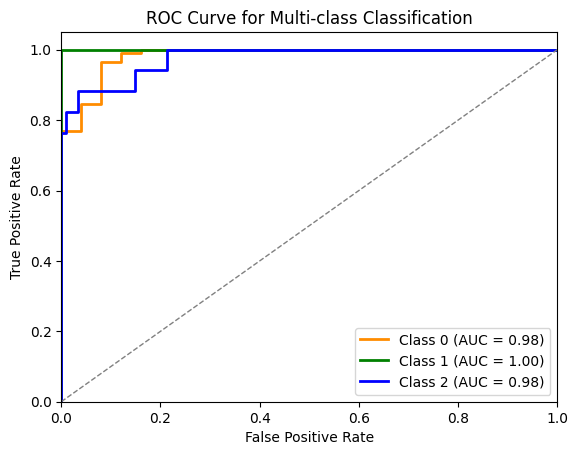

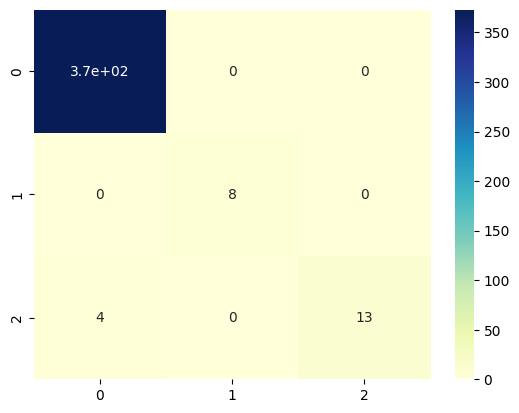

In [12]:
prediction_report(xgb_model)

In [14]:
X_train_2 = pd.read_csv('X_train2.csv')
X_test_2 = pd.read_csv('X_test2.csv')
X_valid_2 = pd.read_csv('X_valid2.csv')
y_valid_2 = pd.read_csv('y_valid2.csv')
y_train_2 = pd.read_csv('y_train2.csv')
y_test_2 = pd.read_csv('y_test2.csv')


In [15]:
xgb_model_2 = xgboost.XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=300, use_label_encoder=False, eval_metric='mlogloss')
# Train the models
xgb_model_2.fit(X_train_2, y_train_2)

# Predictions
xgb_predictions_2 = xgb_model_2.predict(X_valid_2)

# Accuracy & F1score
xgb_accuracy_2 = accuracy_score(y_valid_2, xgb_predictions_2)

xgb_f1_2 = f1_score(y_valid_2, xgb_predictions_2, average='weighted')


print(f"XGBoost Accuracy Validation: {xgb_accuracy_2}")
print(f"XGBoost F1 Score Validation: {xgb_f1_2}")


XGBoost Accuracy Validation: 0.9800443458980045
XGBoost F1 Score Validation: 0.9797537399489875


In [16]:
def prediction_report(model) :
    
    # XX = dataset.drop('OS' , axis=1)
    # yy = dataset['OS']

    # if modelName == 'rf' :
    #     model = RandomForestClassifier(n_estimators=200)
    # if modelName == 'xgb' :
    #     model = XGBClassifier()
    # if modelName == 'cat' :
    #     model = CatBoostClassifier()

    
    # model.fit(XX , yy)

    true_labels = y_test_2
    predicted_probabilities = model.predict_proba(X_test_2)

    report = classification_report(true_labels, np.argmax(predicted_probabilities, axis=1))
    print("Classification Report:\n", report)

    # Compute ROC AUC score
    roc_auc = roc_auc_score(true_labels, predicted_probabilities, multi_class='ovr')  # One-vs-Rest strategy
    print("ROC AUC Score:", roc_auc)

    # Plot ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve((true_labels == i).astype(int), predicted_probabilities[:, i])
        roc_auc[i] = roc_auc_score((true_labels == i).astype(int), predicted_probabilities[:, i])

    plt.figure()
    plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label=f'Class 0 (AUC = {roc_auc[0]:.2f})')
    plt.plot(fpr[1], tpr[1], color='green', lw=2, label=f'Class 1 (AUC = {roc_auc[1]:.2f})')
    plt.plot(fpr[2], tpr[2], color='blue', lw=2, label=f'Class 2 (AUC = {roc_auc[2]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-class Classification')
    plt.legend(loc="lower right")
    plt.show()

    sns.heatmap(confusion_matrix(true_labels , np.argmax(predicted_probabilities, axis=1)) , annot=True , cmap='YlGnBu')
    plt.show()

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       373
         1.0       1.00      1.00      1.00         8
         2.0       1.00      0.76      0.87        17

    accuracy                           0.99       398
   macro avg       1.00      0.92      0.95       398
weighted avg       0.99      0.99      0.99       398

ROC AUC Score: 0.9806621160211778


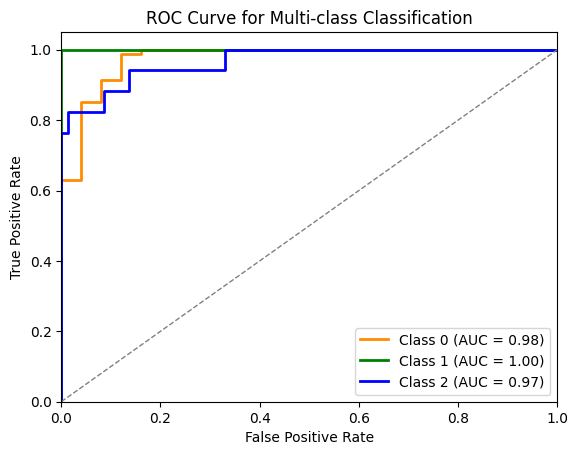

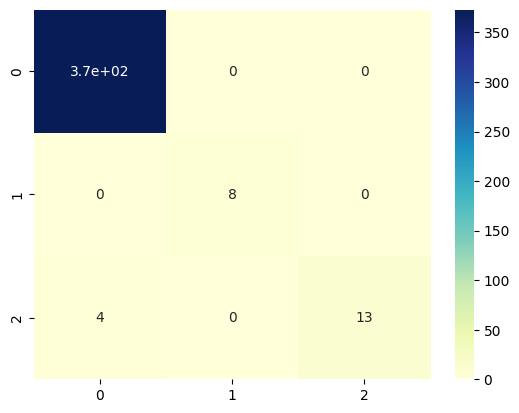

In [17]:
prediction_report(xgb_model_2)